In [ ]:
# DON'T

def function():
    # these return the actual strings that you put here
    return "Error: LineString or Polygon geometries required!"
    # or
    return("Error! Please insert a list of Shapely Points or coordinate tuples!")

length=function(xyz)
print(length)

# DO

def function():
    # ...
    print("Error: LineString or Polygon geometries required!")
    # no return statement or return explicitly None
    return None

# also
    # don't return in brackets
    return (polygon)
    # do
    return polygon


# tuple
PList = (point1, point2)

# list
PList = [point1, point2]


# do not make spaces before the brackets, for readability, but after commas

# all work though :-) but for style

# no
Point (x, y)
# no
Point(x,y)
# yes, ideal
Point(x, y)


# variable and function names, lower case first letters is better

# no
Point1 = createPointGeom(1.5,3.2)
# no
point1 = CreatePointGeom(1.5,3.2)

# yes
point1 = createPointGeom(1.5, 3.2)
point1 = create_point_geom(1.5, 3.2)


# reserved words

def getCentroid(object):
    return object.centroid



# it works, but it's dangerous and might be misleading

# Lesson3: Point in Polygon & Intersect

- https://kodu.ut.ee/~kmoch/geopython2021/L3/point-in-polygon.html

In [2]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [3]:
# Let's check what we have
print(p1)

print(p2)

print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [4]:
# Check if p1 is within the polygon using the within function
print(p1.within(poly))


# Check if p2 is within the polygon
print(p2.within(poly))


True
False


In [5]:
# Our point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


In [6]:
# Does polygon contain p1?
print(poly.contains(p1))


# Does polygon contain p2?
print(poly.contains(p2))

True
False


In [7]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [8]:
line_a.intersects(line_b)

True

In [9]:
line_a.touches(line_b)

True

In [10]:
line_a.touches(line_a)

False

In [11]:
line_a.contains(line_a)

True

In [12]:
line_a.intersects(line_a)

True

In [13]:
import geopandas as gpd

# protected species under class 3 monitoring sightings
species_fp = "category_3_species_porijogi.gpkg"

species_data = gpd.read_file(species_fp, layer='category_3_species_porijogi', driver='GPKG')

c:\dev\conda3\envs\geopy2021a\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [14]:
# porijogi_sub_catchments
polys_fp = "porijogi_sub_catchments.geojson"

polys = gpd.read_file(polys_fp, driver='GeoJSON')

polys.head(5)

OBJECTID     NAME_1       AREA_1    Shape_Leng    Shape_Area  ID  \
0         8     Idaoja  3823.427995  35446.162219  3.823428e+07   1   
1         9  Keskjooks  5087.809731  42814.174755  5.087810e+07   2   
2        10      Peeda  5634.162684  47792.268153  5.634163e+07   3   
3        11       Sipe   890.280919  16449.028656  8.902809e+06   4   
4        12      Tatra  3306.643841  31108.960376  3.306644e+07   5   

                                            geometry  
0  MULTIPOLYGON (((660834.858 6455555.914, 660851...  
1  MULTIPOLYGON (((666339.502 6455972.600, 666384...  
2  MULTIPOLYGON (((659914.002 6456514.131, 659817...  
3  MULTIPOLYGON (((665928.914 6460634.243, 665985...  
4  MULTIPOLYGON (((658678.470 6457825.152, 658579...

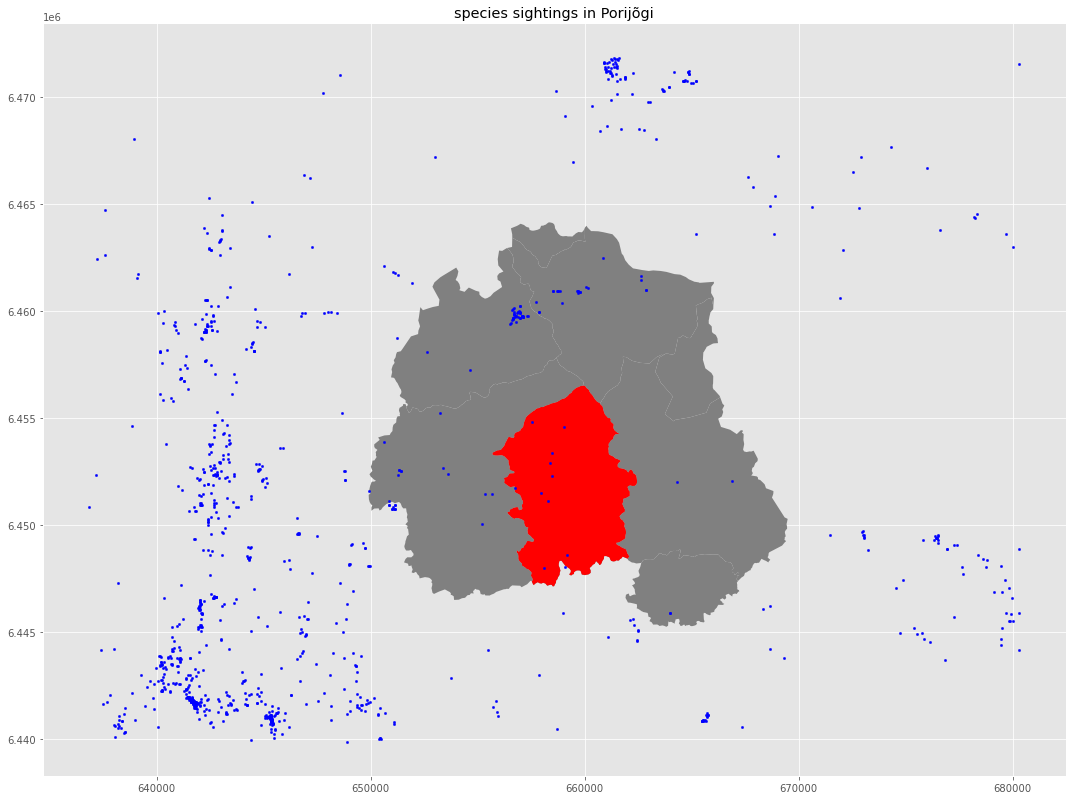

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

subcatch = polys.loc[polys['NAME_1']=='Idaoja']

subcatch.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray')

subcatch.plot(ax=ax, facecolor='red')

species_data.plot(ax=ax, color='blue', markersize=5)

plt.title("species sightings in Porijõgi")

plt.tight_layout()

In [16]:
import shapely.speedups

shapely.speedups.enable()

In [17]:
pip_mask = species_data.within(subcatch.loc[0, 'geometry'])
display(pip_mask)

0       False
1       False
2       False
3       False
4       False
        ...  
1032    False
1033    False
1034    False
1035    False
1036    False
Length: 1037, dtype: bool

In [18]:
pip_data = species_data.loc[pip_mask]
pip_data

OBJECTID        LIIK             NIMI   EXT_SYST_I    KKR_KOOD PRIV_TYYP  \
249    152958  taimed III    ohakasoomukas  -1902179792  KLO9331094    Avalik   
674    145079  loomad III  valge-toonekurg  -1632330969  KLO9105497    Avalik   
691    145191  loomad III  valge-toonekurg   1355787943  KLO9105625    Avalik   
694    145194  loomad III  valge-toonekurg   1430734590  KLO9105624    Avalik   
695    145196  loomad III  valge-toonekurg   1653031368  KLO9105598    Avalik   
979    147275  loomad III  valge-toonekurg   -934352158  KLO9108256    Avalik   
980    147279  loomad III  valge-toonekurg   -345614917  KLO9108257    Avalik   
982    147282  loomad III  valge-toonekurg     13169300  KLO9108254    Avalik   
985    147297  loomad III  valge-toonekurg   1849924613  KLO9108255    Avalik   

          STAATUS  IMPORT  LAADIMISKP                        geometry  
249  kontrollitud       0  2018-10-29  POINT (657531.007 6454827.405)  
674  kontrollitud       0  2018-10-29  POINT (657952.380 6451525.770)  
691  kontrollitud       0  2018-10-29  POINT (659189.190 6448592.205)  
694  kontrollitud       0  2018-10-29  POINT (658311.690 6451115.475)  
695  kontrollitud       0  2018-10-29  POINT (658117.710 6447988.785)  
979  kontrollitud       0  2018-10-29  POINT (659040.735 6454585.439)  
980  kontrollitud       0  2018-10-29  POINT (658493.413 6453377.590)  
982  kontrollitud       0  2018-10-29  POINT (658495.234 6452311.248)  
985  kontrollitud       0  2018-10-29  POINT (658387.491 6452891.505)

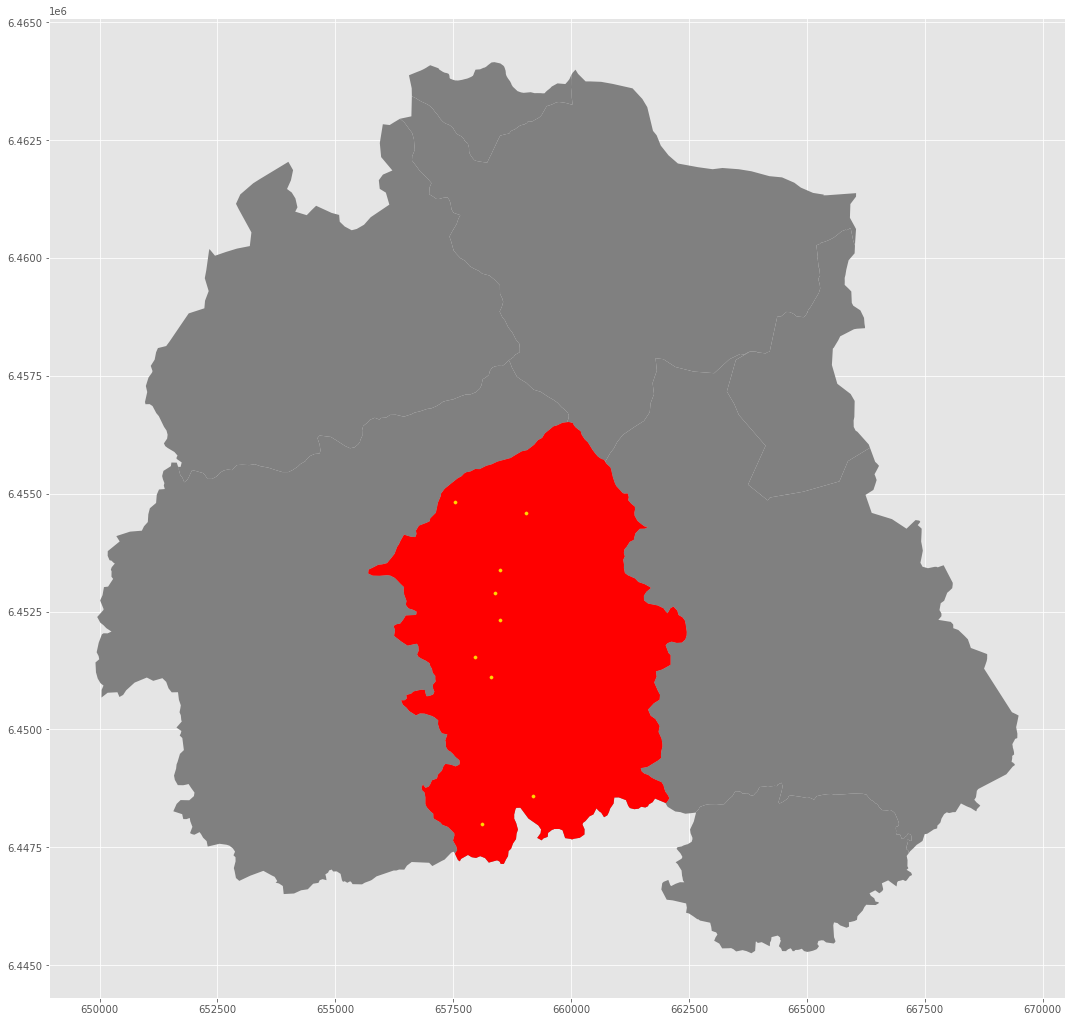

In [19]:
subcatch = polys.loc[polys['NAME_1']=='Idaoja']

subcatch.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray')

subcatch.plot(ax=ax, facecolor='red')

pip_data.plot(ax=ax, color='gold', markersize=10)

plt.tight_layout()

# Lesson3: Spatial join

- https://kodu.ut.ee/~kmoch/geopython2021/L3/spatial-join.html

In [20]:
In [1]: import geopandas as gpd

# Filepath
fp = "porijogi_corine_landuse.shp"

# Read the data
lulc = gpd.read_file(fp)

lulc.head(5)

code_12          id remark    area_ha    shape_area  clc_int Landuse  \
0     112  EU-2024407   None  67.055321  670553.20630      112    URML   
1     112  EU-2024418   None  36.452500  364525.00295      112    URML   
2     112  EU-2024426   None  33.525145  335251.45070      112    URML   
3     112  EU-2024431   None  30.111925  301119.25420      112    URML   
4     112  EU-2024434   None  70.979465  709794.64765      112    URML   

                                            geometry  
0  POLYGON ((658854.791 6458244.203, 658826.936 6...  
1  POLYGON ((663553.865 6459840.806, 663570.622 6...  
2  POLYGON ((659006.349 6463680.667, 659031.241 6...  
3  POLYGON ((658401.027 6466951.556, 658518.679 6...  
4  POLYGON ((658348.310 6467489.990, 658040.310 6...

In [21]:
lulc.columns

Index(['code_12', 'id', 'remark', 'area_ha', 'shape_area', 'clc_int',
       'Landuse', 'geometry'],
      dtype='object')

In [22]:
import pandas as pd

codes = pd.read_csv('corine_landuse_codes.csv', sep=';')
codes

CLC_CODE                         LABEL1  \
0        111            Artificial surfaces   
1        112            Artificial surfaces   
2        121            Artificial surfaces   
3        122            Artificial surfaces   
4        123            Artificial surfaces   
5        124            Artificial surfaces   
6        131            Artificial surfaces   
7        132            Artificial surfaces   
8        133            Artificial surfaces   
9        141            Artificial surfaces   
10       142            Artificial surfaces   
11       211             Agricultural areas   
12       222             Agricultural areas   
13       231             Agricultural areas   
14       242             Agricultural areas   
15       243             Agricultural areas   
16       311  Forest and semi natural areas   
17       312  Forest and semi natural areas   
18       313  Forest and semi natural areas   
19       321  Forest and semi natural areas   
20       322  Forest and semi natural areas   
21       324  Forest and semi natural areas   
22       331  Forest and semi natural areas   
23       333  Forest and semi natural areas   
24       411                       Wetlands   
25       412                       Wetlands   
26       421                       Wetlands   
27       511                   Water bodies   
28       512                   Water bodies   
29       521                   Water bodies   
30       523                   Water bodies   

                                             LABEL2  \
0                                      Urban fabric   
1                                      Urban fabric   
2        Industrial, commercial and transport units   
3        Industrial, commercial and transport units   
4        Industrial, commercial and transport units   
5        Industrial, commercial and transport units   
6                 Mine, dump and construction sites   
7                 Mine, dump and construction sites   
8                 Mine, dump and construction sites   
9      Artificial, non-agricultural vegetated areas   
10     Artificial, non-agricultural vegetated areas   
11                                      Arable land   
12                                  Permanent crops   
13                                         Pastures   
14                 Heterogeneous agricultural areas   
15                 Heterogeneous agricultural areas   
16                                          Forests   
17                                          Forests   
18                                          Forests   
19  Scrub and/or herbaceous vegetation associations   
20  Scrub and/or herbaceous vegetation associations   
21  Scrub and/or herbaceous vegetation associations   
22         Open spaces with little or no vegetation   
23         Open spaces with little or no vegetation   
24                                  Inland wetlands   
25                                  Inland wetlands   
26                                Maritime wetlands   
27                                    Inland waters   
28                                    Inland waters   
29                                    Marine waters   
30                                    Marine waters   

                                               LABEL3          RGB  
0                             Continuous urban fabric  230-000-077  
1                          Discontinuous urban fabric  255-000-000  
2                      Industrial or commercial units  204-077-242  
3          Road and rail networks and associated land  204-000-000  
4                                          Port areas  230-204-204  
5                                            Airports  230-204-230  
6                            Mineral extraction sites  166-000-204  
7                                          Dump sites  166-077-000  
8                                  Construction sites  255-077-255  
9                                   Green urban 

In [23]:
lulc = lulc.merge(codes, left_on='clc_int', right_on='CLC_CODE')
lulc.sample(10)

code_12          id remark     area_ha    shape_area  clc_int Landuse  \
15      211  EU-2026596   None   29.105535  2.910554e+05      211    AGRL   
4       112  EU-2024434   None   70.979465  7.097946e+05      112    URML   
172     313  EU-2046164   None   35.475546  3.547555e+05      313    FRST   
131     243  EU-2034362   None  137.819209  1.378192e+06      243    AGRL   
181     313  EU-2046229   None  212.167982  2.121680e+06      313    FRST   
134     243  EU-2034387   None  113.369806  1.133698e+06      243    AGRL   
72      242  EU-2032375   None   68.209919  6.820992e+05      242    AGRL   
19      211  EU-2026646   None  104.857563  1.048576e+06      211    AGRL   
51      211  EU-2026874   None   73.518050  7.351805e+05      211    AGRL   
66      231  EU-2029910   None   26.204836  2.620484e+05      231    PAST   

                                              geometry  CLC_CODE  \
15   POLYGON ((667346.056 6448925.436, 667282.868 6...       211   
4    POLYGON ((658348.310 6467489.990, 658040.310 6...       112   
172  POLYGON ((661187.740 6450271.488, 661214.937 6...       313   
131  POLYGON ((659379.808 6459999.493, 659243.178 6...       243   
181  POLYGON ((650642.480 6454192.196, 650637.306 6...       313   
134  POLYGON ((661464.244 6460808.992, 661429.429 6...       243   
72   POLYGON ((655704.812 6451331.996, 655671.553 6...       242   
19   POLYGON ((665988.498 6451596.495, 666040.558 6...       211   
51   POLYGON ((662998.119 6465195.489, 663004.989 6...       211   
66   POLYGON ((653454.668 6461601.502, 653436.373 6...       231   

                            LABEL1                            LABEL2  \
15              Agricultural areas                       Arable land   
4              Artificial surfaces                      Urban fabric   
172  Forest and semi natural areas                           Forests   
131             Agricultural areas  Heterogeneous agricultural areas   
181  Forest and semi natural areas                           Forests   
134             Agricultural areas  Heterogeneous agricultural areas   
72              Agricultural areas  Heterogeneous agricultural areas   
19              Agricultural areas                       Arable land   
51              Agricultural areas                       Arable land   
66              Agricultural areas                          Pastures   

                                                LABEL3          RGB  
15                           Non-irrigated arable land  255-255-168  
4                           Discontinuous urban fabric  255-000-000  
172                                       Mixed forest  077-255-000  
131  Land principally occupied by agriculture, with...  230-204-077  
181                                       Mixed forest  077-255-000  
134  Land principally occupied by agriculture, with...  230-204-077  
72                        Complex cultivation patterns  255-230-077  
19                           Non-irrigated arable land  255-255-168  
51                           Non-irrigated arable land  255-255-168  
66                                            Pastures  230-230-077

In [24]:
selected_cols = ['Landuse', 'LABEL2','geometry']
lulc = lulc[selected_cols]
lulc.sample(10)

Landuse                                           LABEL2  \
76     AGRL                 Heterogeneous agricultural areas   
121    AGRL                 Heterogeneous agricultural areas   
220    RNGB  Scrub and/or herbaceous vegetation associations   
109    AGRL                 Heterogeneous agricultural areas   
213    RNGB  Scrub and/or herbaceous vegetation associations   
223    RNGB  Scrub and/or herbaceous vegetation associations   
170    FRST                                          Forests   
212    RNGB  Scrub and/or herbaceous vegetation associations   
68     PAST                                         Pastures   
211    RNGB  Scrub and/or herbaceous vegetation associations   

                                              geometry  
76   POLYGON ((668361.871 6451095.995, 668304.999 6...  
121  POLYGON ((658183.498 6456106.487, 658016.500 6...  
220  POLYGON ((657621.023 6456368.367, 657599.412 6...  
109  POLYGON ((651494.931 6452533.989, 651562.559 6...  
213  POLYGON ((664367.934 6450738.987, 664230.617 6...  
223  POLYGON ((658153.539 6457386.604, 657880.580 6...  
170  POLYGON ((659427.992 6448648.488, 659436.372 6...  
212  POLYGON ((653098.497 6452959.488, 653259.749 6...  
68   POLYGON ((656614.252 6463017.529, 656787.248 6...  
211  POLYGON ((665445.498 6448844.493, 665500.993 6...

In [25]:
# protected species under class 3 monitoring sightings
species_fp = "category_3_species_porijogi.gpkg"

species = gpd.read_file(species_fp, layer='category_3_species_porijogi', driver='GPKG')

display(species.sample(5))
display(species.crs)
display(lulc.crs)

c:\dev\conda3\envs\geopy2021a\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


OBJECTID        LIIK                NIMI  EXT_SYST_I    KKR_KOOD  \
29     144416  taimed III   vööthuul-sõrmkäpp  -614049812  KLO9313170   
526    148300  taimed III   vööthuul-sõrmkäpp   815127342  KLO9320114   
790    147724  taimed III      roomav öövilge   -94187385  KLO9319325   
326    148406  taimed III  pruunikas pesajuur  1056565733  KLO9320451   
312    148395  taimed III  pruunikas pesajuur  -660792309  KLO9320469   

    PRIV_TYYP       STAATUS  IMPORT  LAADIMISKP  \
29     Avalik  kontrollitud       0  2018-10-29   
526    Avalik  kontrollitud       0  2018-10-29   
790    Avalik  kontrollitud       0  2018-10-29   
326    Avalik  kontrollitud       0  2018-10-29   
312    Avalik  kontrollitud       0  2018-10-29   

                           geometry  
29   POINT (641517.503 6441975.689)  
526  POINT (641823.700 6450684.161)  
790  POINT (641628.225 6441726.605)  
326  POINT (641770.266 6441472.759)  
312  POINT (642135.003 6445259.864)

<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia - onshore and offshore.
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia - onshore and offshore.
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
join = gpd.sjoin(species, lulc, how="inner", op="within")

join.head()

OBJECTID        LIIK               NIMI   EXT_SYST_I    KKR_KOOD  \
126    144115  taimed III  läikiv kurdsirbik  -1324418359  KLO9400024   
132    144202  taimed III    siberi võhumõõk   1344032932  KLO9312850   
157    151696  taimed III     balti sõrmkäpp   -376320786  KLO9317690   
201    154300  taimed III  harilik käoraamat   -403691661  KLO9303449   
257    154692  taimed III       suur käopõll   1784194494  KLO9303464   

    PRIV_TYYP       STAATUS  IMPORT  LAADIMISKP  \
126    Avalik  kontrollitud       0  2018-10-29   
132    Avalik  kontrollitud       0  2018-10-29   
157    Avalik  kontrollitud       0  2018-10-29   
201    Avalik  kontrollitud       0  2018-10-29   
257    Avalik  kontrollitud       0  2018-10-29   

                           geometry  index_right Landuse  \
126  POINT (652641.854 6458099.088)          224    RNGB   
132  POINT (660367.911 6469599.134)          143    FRSD   
157  POINT (656609.812 6459582.666)          201    FRST   
201  POINT (657356.897 6459780.112)          201    FRST   
257  POINT (657291.854 6459783.092)          201    FRST   

                                              LABEL2  
126  Scrub and/or herbaceous vegetation associations  
132                                          Forests  
157                                          Forests  
201                                          Forests  
257                                          Forests

In [27]:
# Output path
outfp = "landuse_per_species.shp"

# Save to disk
join.to_file(outfp)

C:\temp/ipykernel_19360/2373768796.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  join.to_file(outfp)


In [28]:
join['NIMI'].value_counts()

balti sõrmkäpp            20
valge-toonekurg           20
kahkjaspunane sõrmkäpp    17
suur käopõll              16
aas-karukell               6
soo-neiuvaip               5
vööthuul-sõrmkäpp          5
sulgjas õhik               2
harilik käoraamat          2
siberi võhumõõk            2
läikiv kurdsirbik          1
valgelaup-rabakiil         1
Veski                      1
kodukakk                   1
hink                       1
vingerjas                  1
kuradi-sõrmkäpp            1
ohakasoomukas              1
suur-kuldtiib              1
roomav öövilge             1
hall käpp                  1
suur-rabakiil              1
Name: NIMI, dtype: int64

In [29]:
join['LABEL2'].value_counts()

Forests                                            52
Scrub and/or herbaceous vegetation associations    22
Heterogeneous agricultural areas                   22
Pastures                                            4
Urban fabric                                        2
Inland waters                                       2
Arable land                                         2
Inland wetlands                                     1
Name: LABEL2, dtype: int64

In [30]:
data_list = [] 

for species_id, species_group in join.groupby('NIMI'):
    lulc_count = species_group['LABEL2'].value_counts()
    top = lulc_count.head(1)
    # display(type(top))
    # print(top)
    data_list.append(
        {
            'species_id':species_id,
            'all_sights': len(species_group),
            'top_lulc': top.index[0],
            'sights_in_top': top[0]
        }
    )
    print("species_id: {}, number of sightings: {}, top lulc: {}, number: {}".format(species_id, len(species_group), top.index[0], top[0] ))

species_id: Veski, number of sightings: 1, top lulc: Forests, number: 1
species_id: aas-karukell, number of sightings: 6, top lulc: Forests, number: 4
species_id: balti sõrmkäpp, number of sightings: 20, top lulc: Forests, number: 12
species_id: hall käpp, number of sightings: 1, top lulc: Forests, number: 1
species_id: harilik käoraamat, number of sightings: 2, top lulc: Forests, number: 1
species_id: hink, number of sightings: 1, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: kahkjaspunane sõrmkäpp, number of sightings: 17, top lulc: Forests, number: 12
species_id: kodukakk, number of sightings: 1, top lulc: Heterogeneous agricultural areas, number: 1
species_id: kuradi-sõrmkäpp, number of sightings: 1, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: läikiv kurdsirbik, number of sightings: 1, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: ohakasoomukas, number of sightings: 1, top lul

In [31]:
# Creates DataFrame. 
top_sights = pd.DataFrame(data_list) 
  
# Print the data 
top_sights.sort_values(by=['all_sights','sights_in_top'], ascending=False)

species_id  all_sights  \
18         valge-toonekurg          20   
2           balti sõrmkäpp          20   
6   kahkjaspunane sõrmkäpp          17   
15            suur käopõll          16   
1             aas-karukell           6   
13            soo-neiuvaip           5   
21       vööthuul-sõrmkäpp           5   
4        harilik käoraamat           2   
12         siberi võhumõõk           2   
14            sulgjas õhik           2   
0                    Veski           1   
3                hall käpp           1   
5                     hink           1   
7                 kodukakk           1   
8          kuradi-sõrmkäpp           1   
9        läikiv kurdsirbik           1   
10           ohakasoomukas           1   
11          roomav öövilge           1   
16           suur-kuldtiib           1   
17           suur-rabakiil           1   
19      valgelaup-rabakiil           1   
20               vingerjas           1   

                                           top_lulc  sights_in_top  
18                 Heterogeneous agricultural areas             15  
2                                           Forests             12  
6                                           Forests             12  
15                                          Forests             14  
1                                           Forests              4  
13  Scrub and/or herbaceous vegetation associations              3  
21                                          Forests              3  
4                                           Forests              1  
12                                          Forests              1  
14  Scrub and/or herbaceous vegetation associations              1  
0                                           Forests              1  
3                                           Forests              1  
5   Scrub and/or herbaceous vegetation associations              1  
7                  Heterogeneous agricultural areas              1  
8   Scrub and/or herbaceous vegetation associations              1  
9   Scrub and/or herbaceous vegetation associations              1  
10                                          Forests              1  
11                 Heterogeneous agricultural areas              1  
16                                  Inland wetlands              1  
17                                    Inland waters              1  
19                                    Inland waters              1  
20                 Heterogeneous agricultural areas              1